# Imports

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/home/marcos/computacion/metodos_numericos_2c_2024/film-genre-classifier/film-classifier/")
from classifier import *

# 3.a KNN test
k = 5
## TODO: PROBAR Q = 500, 1000, 5000
80/20 train/test

In [6]:
K = 40
Q = 1000

df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_test, y_test = test_document_term_matrix(df_test, df_train, Q)
print(y_train.shape)
print(y_test.shape)
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
vecinos = calcular_vecinos(X_train, X_test)

promedio_k_fijo = medir_exactitud(vecinos, y_train, y_test, K)

print("Resultados Experimento 2:")
print("Con k: ", K, ", exactitud obtenida: ", promedio_k_fijo, sep = '')

(320, 1)
(80, 1)
(80, 320)
Resultados Experimento 2:
Con k: 40, exactitud obtenida: 0.8125


# 3.b K exploration


In [ ]:
k_maximo = 250
Q = 1000

df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_train, y_train = balancear_clases(X_train, y_train)

X_test, y_test = test_document_term_matrix(df_test, df_train, Q)

promedio_aciertos_k = four_fold_cross_validation_k_exploration(X_train, y_train, k_maximo)

In [ ]:
f, ax = plt.subplots(1)
ax.plot(promedio_aciertos_k[1:])
plt.title("Exploracion hiperparametro K")
ax.set_xlabel("# vecinos")
ax.set_ylabel("% exactitud")
f.savefig('../results/figures/exploracion_param_k.png', bbox_inches='tight')


In [ ]:
# ZOOM primeros 30 elementos, mostrar max
mejor_k = np.argmax(promedio_aciertos_k)
exac_mejor_k = promedio_aciertos_k[mejor_k]
f, ax = plt.subplots(1)
plt.axvline(x=mejor_k, color="k", linestyle="--")
plt.axhline(y=exac_mejor_k, color="r", linestyle="--")
# print(promedio_aciertos_k[1])
plt.plot(range(1,k_maximo), promedio_aciertos_k[1:k_maximo])
# plt.yticks(list(plt.xticks()[0]) + promedio_aciertos_k[mejor_k])
titulo = "Exploracion hiperparametro K, K*=" + str(mejor_k)
plt.title(titulo)
# print("Mejor k:", mejor_k)
# print("Mejor exactitud:", promedios[mejor_k])

# xt = ax.get_xticks() 
# xt=np.append(xt,1)

# xtl=xt.tolist()
# xtl[-1]="K=1"
# ax.set_xticks(xt)
# ax.set_xticklabels(xtl)

# ticks = [tick for tick in plt.gca().get_xticks() if tick >=0]
# ax.set_xticks(ticks)
# ax.set_xlim(left=1)

yt = ax.get_yticks()
yt = np.append(yt,exac_mejor_k)

ytl = yt.tolist()
ytl[-1] = exac_mejor_k
ax.set_yticks(yt)
ax.set_yticklabels(ytl)

ticks = [tick for tick in plt.gca().get_yticks() if tick >=0]
ax.set_yticks(ticks)

# ax.set_xlim(right=30)

plt.savefig('../results/figures/exploracion_param_k_zoom.png', bbox_inches='tight')

# 4: PCA
Preprocesar los datos de entrenamiento con PCA, usando la implementación del método de la potencia para encontrar los autovectores de la matriz de covarianza.
Visualizar la cantidad de varianza explicada en función de la cantidad de componentes p.

In [ ]:
print("Corriendo Experimento 4...")

In [ ]:
# Fueron hallados con los siguientes parametros
Q = 1000
df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_test, y_test = test_document_term_matrix(df_test, df_train, Q)
S, V = covarianceMatrixEVD(X_train, 100, 1e-7) # iteraciones, precision

In [ ]:

# Your existing code for var_cumu and p_95 remains the same
var_cumu = np.cumsum(S) / np.sum(S)
p_95 = np.argmax(var_cumu > 0.95)

print("Resultado de Experimento 4:")
print("Numero de componentes que explican 95% de la varianza", p_95)

# First figure
fig1, ax1 = plt.subplots()
ax1.semilogy(S[:200])  # Limit to the first 200 components
ax1.set_ylabel("Varianza explicada por componente")
ax1.set_xlabel('# componente')
fig1.savefig('../results/figures/varianza_por_componente.png', bbox_inches='tight')

# Second figure
fig2, ax2 = plt.subplots()
ax2.plot(var_cumu[:200])  # Limit to the first 200 components
ax2.axvline(x=min(p_95, 199), color="k", linestyle="--")  # Ensure p_95 does not exceed 199
ax2.axhline(y=0.95, color="r", linestyle="--")
ax2.set_ylabel("Varianza explicada acumulada")
ax2.set_xlabel('# componentes')

# Set x-ticks
xticks2 = [i for i in range(0, 201, 100)]  # Adjust to go up to 200
xticks2.append(min(p_95, 199))  # Ensure p_95 does not exceed 199
ax2.set_xticks(xticks2)

# Set y-ticks
yticks2 = [i / 10.0 for i in range(3, 11, 1)]
yticks2.append(0.95)
ax2.set_yticks(yticks2)

fig2.savefig('../results/figures/varianza_explicada.png', bbox_inches='tight')


In [ ]:
S[400]

# 5: Pipeline final - Exploración conjunta de los hiperparámetros k de KNN, y p de PCA.

Configurar y correr.

In [ ]:
print("Corriendo Experimento 5...")

In [ ]:
k_minimo = 1
k_maximo = 250
Q = default_Q
# ps = np.concatenate((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 784, 50)))
ps = np.arange(1, 250, 25)
df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_train, y_train = balancear_clases(X_train, y_train)
X_test, y_test = test_document_term_matrix(df_test, df_train, Q)
V_folds = load_folds_covMatEVD(X_train, y_train)

In [ ]:
promedios_p_k = four_fold_cross_validation_k_p_exploration(V_folds, X_train, y_train, k_maximo, ps)

In [ ]:
save_variable(promedios_p_k, "promedios_p_k")

In [ ]:
# Hallar k* y p*
# k_maximo, ps, promedios_p_k = load_variable(file_name['exploracion_p_k'])

P_optimo, K_optimo, mejorExactitud = arg_max_p_k(ps, k_maximo, promedios_p_k)
print("Resultados cross validation, exploracion de k en: [1,", k_maximo,"] y p en:", ps)
print("P*: ", P_optimo, " K*: ", K_optimo, " Exa: ", mejorExactitud, sep='')

In [ ]:
plt.plot(ps, promedios_p_k[::,1])
titulo = "Exactitud para distintos P con K=" + str(K_optimo)
plt.title(titulo)
# plt.ax
plt.savefig('../results/figures/cross_validation_k_p_exa_k1_2d.png', bbox_inches='tight')

In [ ]:
# Visualizar el cross validation
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, k_maximo) # K
Y = ps
X, Y = np.meshgrid(X, Y)
Z = promedios_p_k[::, 1:k_maximo] # Ignorar k=0

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       alpha=0.75)

ax.scatter(K_optimo, P_optimo, mejorExactitud, color='blue', s=50)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('K Vecinos')
ax.set_ylabel('P Componentes')
ax.set_zlabel('% Exactitud')
titulo = "Valores optimos K*:" + str(K_optimo) + ", P*:" + str(P_optimo)
ax.set_title(titulo)
# ax.view_init(elev=10, azim=-80, roll=0)
fig.savefig('../results/figures/cross_validation_k_p_exa_3d.png', bbox_inches='tight')

# 6: TF-IDF
Transformar la matriz de conteo de palabras con el proceso TF-IDF (del inglés Term
frequency – Inverse document frequency), aplicar la búsqueda de hiper-parámetros a
esta nueva matriz de datos y reportar las diferencias.

In [ ]:
K = 40
Q = 500
df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_train, y_train = balancear_clases(X_train, y_train)
X_test, y_test = test_document_term_matrix(df_test, df_train, Q)
idf_train = inverse_document_frequency_matrix(df_train, Q)
idf_train = np.tile(idf_train.T, (320,1))

X_train = X_train * idf_train
X_test = X_test * idf_train

X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
vecinos = calcular_vecinos(X_train, X_test)

promedio_k_fijo = medir_exactitud(vecinos, y_train, y_test, K)

print("Resultados Experimento 2:")
print("Con k: ", K, ", exactitud obtenida: ", promedio_k_fijo, sep = '')

In [ ]:
K = 1
Q = 500
df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_train, y_train = balancear_clases(X_train, y_train)
X_test, y_test = test_document_term_matrix(df_test, df_train, Q)
idf_train = inverse_document_frequency_matrix(df_train, Q)
idf_train = np.tile(idf_train.T, (320,1))

X_train = X_train * idf_train
X_test = X_test * idf_train

promedio_aciertos_k = four_fold_cross_validation_k_exploration(X_train, y_train, k_maximo)

In [ ]:
f, ax = plt.subplots(1)
ax.plot(promedio_aciertos_k[1:])
plt.title("Exploracion hiperparametro K")
ax.set_xlabel("# vecinos")
ax.set_ylabel("% exactitud")
f.savefig('../results/figures/exploracion_param_k.png', bbox_inches='tight')

In [ ]:
# ZOOM primeros 30 elementos, mostrar max
mejor_k = np.argmax(promedio_aciertos_k)
exac_mejor_k = promedio_aciertos_k[mejor_k]
f, ax = plt.subplots(1)
plt.axvline(x=mejor_k, color="k", linestyle="--")
plt.axhline(y=exac_mejor_k, color="r", linestyle="--")
# print(promedio_aciertos_k[1])
plt.plot(range(1,k_maximo), promedio_aciertos_k[1:k_maximo])
# plt.yticks(list(plt.xticks()[0]) + promedio_aciertos_k[mejor_k])
titulo = "Exploracion hiperparametro K, K*=" + str(mejor_k)
plt.title(titulo)
# print("Mejor k:", mejor_k)
# print("Mejor exactitud:", promedios[mejor_k])

# xt = ax.get_xticks() 
# xt=np.append(xt,1)

# xtl=xt.tolist()
# xtl[-1]="K=1"
# ax.set_xticks(xt)
# ax.set_xticklabels(xtl)

# ticks = [tick for tick in plt.gca().get_xticks() if tick >=0]
# ax.set_xticks(ticks)
# ax.set_xlim(left=1)

yt = ax.get_yticks()
yt = np.append(yt,exac_mejor_k)

ytl = yt.tolist()
ytl[-1] = exac_mejor_k
ax.set_yticks(yt)
ax.set_yticklabels(ytl)

ticks = [tick for tick in plt.gca().get_yticks() if tick >=0]
ax.set_yticks(ticks)

# ax.set_xlim(right=30)

plt.savefig('../results/figures/exploracion_param_k_zoom.png', bbox_inches='tight')

# 7 Distancia Euclidea

In [16]:
K = 40
Q = 1000

df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_test, y_test = test_document_term_matrix(df_test, df_train, Q)

X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
print(X_train.shape)
print(X_test.shape)
vecinos = calcular_vecinos(X_train, X_test, False)
print(vecinos.shape)
promedio_k_fijo = medir_exactitud(vecinos, y_train, y_test, K)

print("Resultados Experimento 2:")
print("Con k: ", K, ", exactitud obtenida: ", promedio_k_fijo, sep = '')

(320, 1000)
(80, 1000)
(80, 320)
(80, 320)
Resultados Experimento 2:
Con k: 40, exactitud obtenida: 0.8125


In [17]:
k_maximo = 250
Q = 1000

df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_train, y_train = balancear_clases(X_train, y_train)

X_test, y_test = test_document_term_matrix(df_test, df_train, Q)

promedio_aciertos_k = four_fold_cross_validation_k_exploration(X_train, y_train, k_maximo, False)

(80, 240)
(80, 240)
(80, 240)
(80, 240)


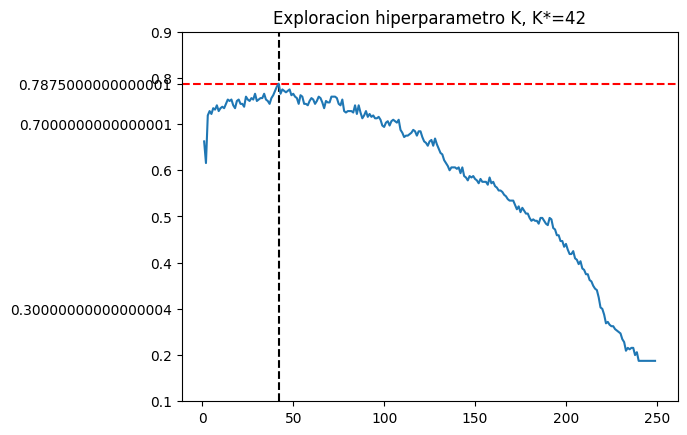

In [18]:
# ZOOM primeros 30 elementos, mostrar max
mejor_k = np.argmax(promedio_aciertos_k)
exac_mejor_k = promedio_aciertos_k[mejor_k]
f, ax = plt.subplots(1)
plt.axvline(x=mejor_k, color="k", linestyle="--")
plt.axhline(y=exac_mejor_k, color="r", linestyle="--")
# print(promedio_aciertos_k[1])
plt.plot(range(1,k_maximo), promedio_aciertos_k[1:k_maximo])
# plt.yticks(list(plt.xticks()[0]) + promedio_aciertos_k[mejor_k])
titulo = "Exploracion hiperparametro K, K*=" + str(mejor_k)
plt.title(titulo)
# print("Mejor k:", mejor_k)
# print("Mejor exactitud:", promedios[mejor_k])

# xt = ax.get_xticks() 
# xt=np.append(xt,1)

# xtl=xt.tolist()
# xtl[-1]="K=1"
# ax.set_xticks(xt)
# ax.set_xticklabels(xtl)

# ticks = [tick for tick in plt.gca().get_xticks() if tick >=0]
# ax.set_xticks(ticks)
# ax.set_xlim(left=1)

yt = ax.get_yticks()
yt = np.append(yt,exac_mejor_k)

ytl = yt.tolist()
ytl[-1] = exac_mejor_k
ax.set_yticks(yt)
ax.set_yticklabels(ytl)

ticks = [tick for tick in plt.gca().get_yticks() if tick >=0]
ax.set_yticks(ticks)

# ax.set_xlim(right=30)

plt.savefig('../results/figures/exploracion_param_k_zoom.png', bbox_inches='tight')